In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/Vibhu/Downloads/Datasets/Train'
valid_path = 'C:/Users/Vibhu/Downloads/Datasets/Test'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('C:/Users/Vibhu/Downloads/Datasets/train/*')

In [7]:
folders

['C:/Users/Vibhu/Downloads/Datasets/train\\audi',
 'C:/Users/Vibhu/Downloads/Datasets/train\\lamborghini',
 'C:/Users/Vibhu/Downloads/Datasets/train\\mercedes']

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('C:/Users/Vibhu/Downloads/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:/Users/Vibhu/Downloads/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 9s 5s/step - loss: 5.2869 - accuracy: 0.3750 - val_loss: 9.4356 - val_accuracy: 0.1724
Epoch 2/50
2/2 [==============================] - 8s 4s/step - loss: 4.9049 - accuracy: 0.4531 - val_loss: 2.8796 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 8s 4s/step - loss: 2.8490 - accuracy: 0.3906 - val_loss: 3.3875 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 7s 4s/step - loss: 3.0630 - accuracy: 0.4219 - val_loss: 2.7973 - val_accuracy: 0.1724
Epoch 5/50
2/2 [==============================] - 8s 4s/step - loss: 2.0648 - accuracy: 0.3906 - val_loss: 3.3716 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 8s 4s/step - loss: 1.8010 - accuracy: 0.4375 - val_loss: 1.4494 - val_accuracy: 0.5690
Epoch 7/50
2/2 [==============================] - 8s 4s/step - loss: 1.7876 - accuracy: 0.5938 - val_l

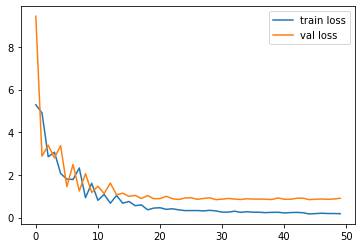

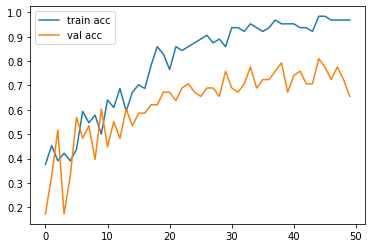

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [57]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

In [31]:
y_pred

array([1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2,
       1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2], dtype=int64)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [92]:
img=image.load_img('C:/Users/Vibhu/Downloads/Datasets/Test/audi/23.jpg',target_size=(224,224))
img.show()

In [93]:
x=image.img_to_array(img)
x

array([[[171., 171., 171.],
        [173., 173., 173.],
        [180., 180., 180.],
        ...,
        [178., 181., 186.],
        [151., 154., 159.],
        [137., 140., 145.]],

       [[179., 179., 179.],
        [182., 182., 182.],
        [189., 189., 189.],
        ...,
        [201., 204., 209.],
        [169., 172., 177.],
        [145., 148., 153.]],

       [[191., 191., 191.],
        [194., 194., 194.],
        [200., 200., 200.],
        ...,
        [205., 208., 213.],
        [171., 174., 179.],
        [146., 149., 154.]],

       ...,

       [[218., 206., 208.],
        [216., 204., 206.],
        [211., 199., 201.],
        ...,
        [112., 103.,  96.],
        [109., 100.,  93.],
        [109., 100.,  93.]],

       [[220., 208., 210.],
        [218., 206., 208.],
        [212., 200., 202.],
        ...,
        [116., 107., 100.],
        [114., 105.,  98.],
        [114., 105.,  98.]],

       [[220., 211., 212.],
        [218., 209., 210.],
        [211., 2

In [94]:
x.shape

(224, 224, 3)

In [95]:
x=x/255

In [96]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [97]:
model.predict(img_data)

array([[0.03339949, 0.08722928, 0.8793712 ]], dtype=float32)

In [98]:
a=np.argmax(model.predict(img_data), axis=1)

In [99]:
a==2

array([ True])